6351071049_Lab2_Bài 4(26)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving winequality-red.csv to winequality-red (1).csv


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0])
print("Dữ liệu ban đầu:", data.shape)
data.head()


Dữ liệu ban đầu: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Trần Khôi Nguyên_6351071049 - Câu 3: Khảo sát tương quan Pearson


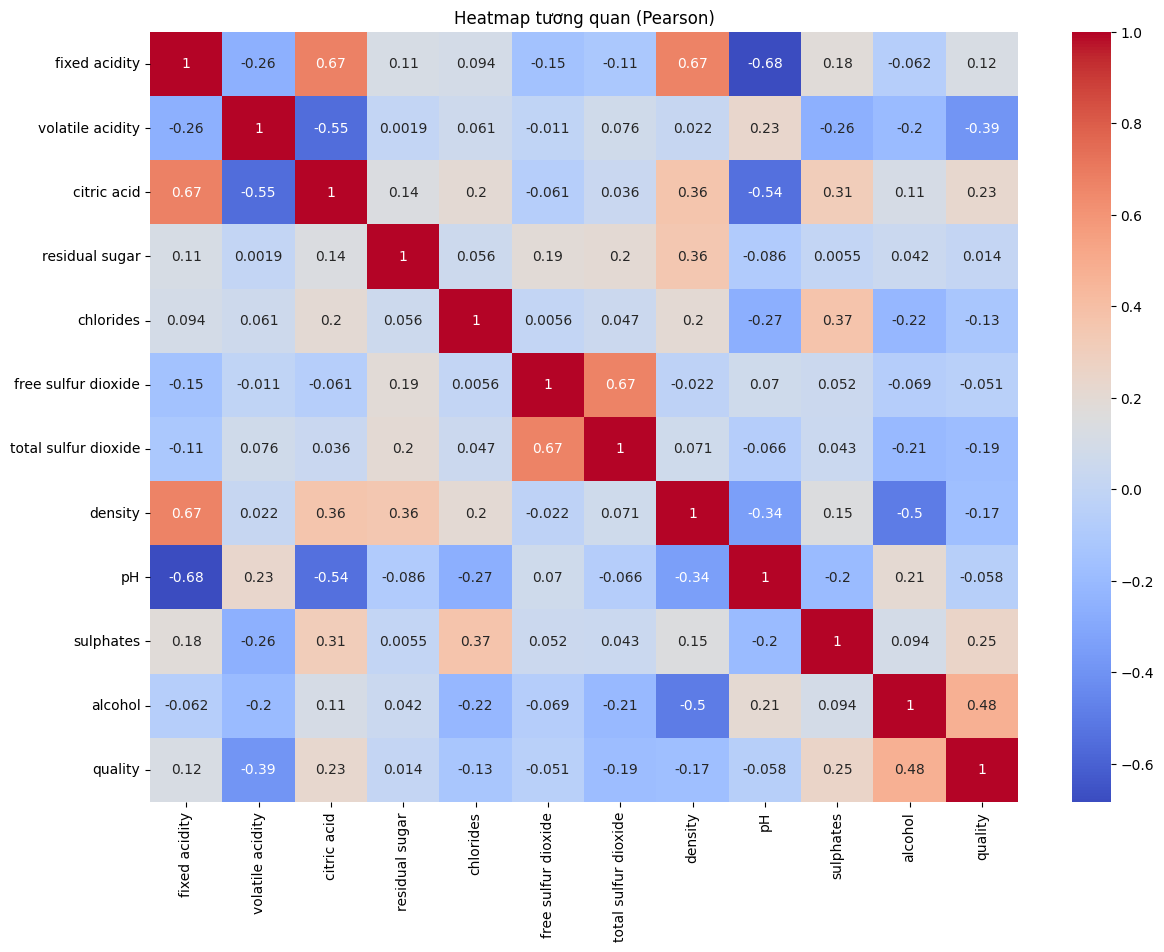

Không có thuộc tính tương quan cao → không loại bỏ cột nào.


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 3: Khảo sát tương quan Pearson")

corr = data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap tương quan (Pearson)")
plt.show()

print("Không có thuộc tính tương quan cao → không loại bỏ cột nào.")



In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 4: Tách features và labels")

X = data.drop(columns=["quality"])
y = data["quality"]

print("Features:", X.shape)
print("Labels:", y.shape)


Trần Khôi Nguyên_6351071049 - Câu 4: Tách features và labels
Features: (1599, 11)
Labels: (1599,)


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 5: Chuẩn hóa dữ liệu bằng StandardScaler")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dữ liệu sau chuẩn hóa:", X_scaled.shape)


Trần Khôi Nguyên_6351071049 - Câu 5: Chuẩn hóa dữ liệu bằng StandardScaler
Dữ liệu sau chuẩn hóa: (1599, 11)


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 6: Chia dữ liệu train/test")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape,  y_test.shape)


Trần Khôi Nguyên_6351071049 - Câu 6: Chia dữ liệu train/test
Train: (1119, 11) (1119,)
Test : (480, 11) (480,)


Trần Khôi Nguyên_6351071049 - Câu 7: Mô hình ID3 (entropy)
Accuracy ID3: 0.5791666666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.06      0.11        17
           5       0.63      0.82      0.71       195
           6       0.55      0.51      0.53       200
           7       0.38      0.25      0.30        61
           8       0.00      0.00      0.00         6

    accuracy                           0.58       480
   macro avg       0.43      0.27      0.28       480
weighted avg       0.57      0.58      0.55       480



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


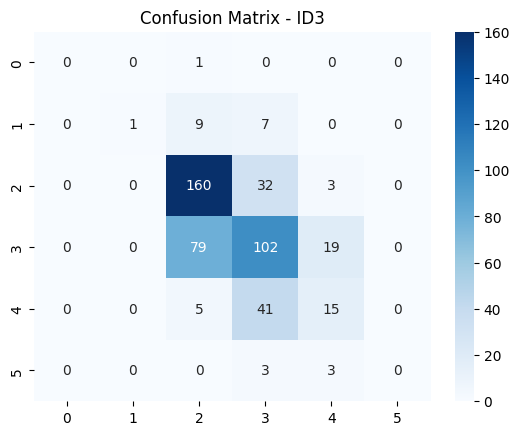

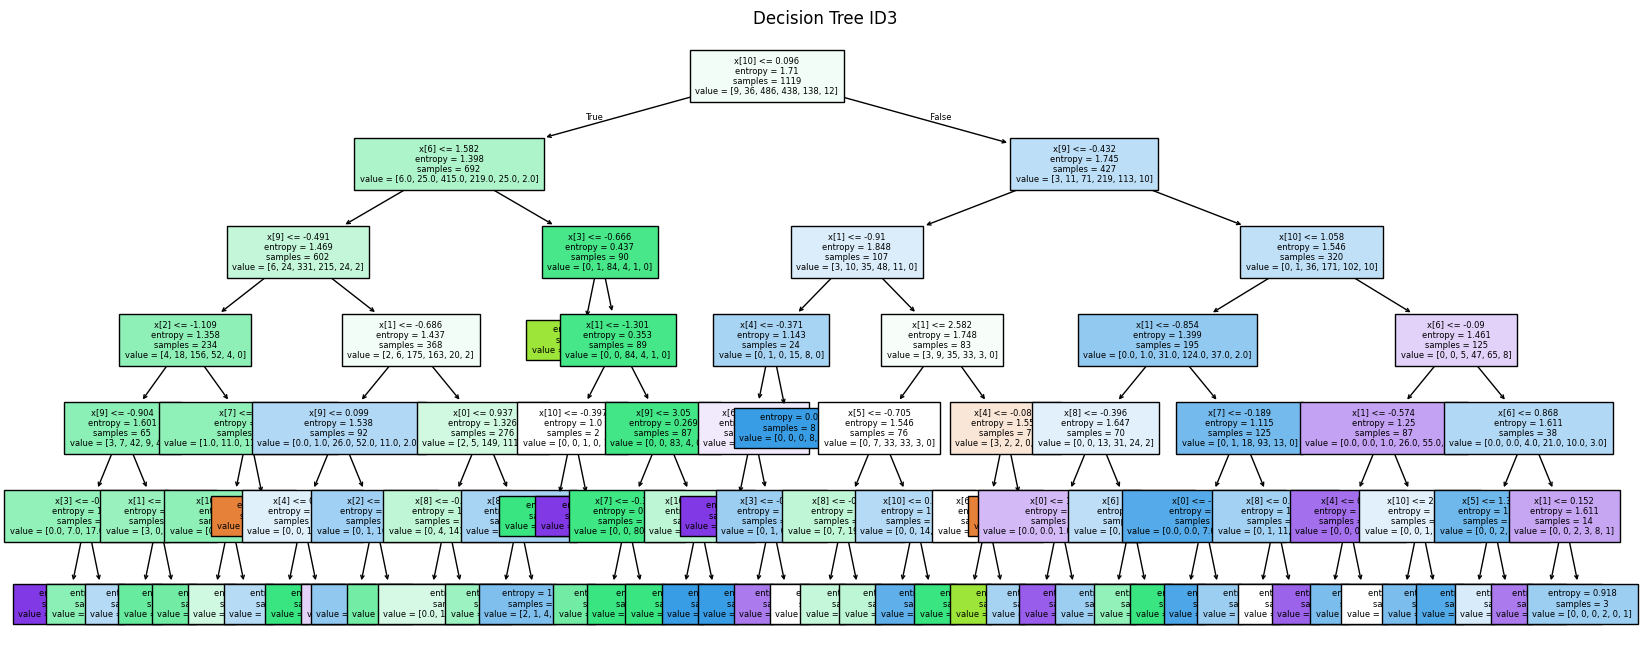

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 7: Mô hình ID3 (entropy)")

id3 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
id3.fit(X_train, y_train)

y_pred_id3 = id3.predict(X_test)

print("Accuracy ID3:", accuracy_score(y_test, y_pred_id3))
print(classification_report(y_test, y_pred_id3))

cm = confusion_matrix(y_test, y_pred_id3)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - ID3")
plt.show()

plt.figure(figsize=(20,8))
plot_tree(id3, filled=True, fontsize=6)
plt.title("Decision Tree ID3")
plt.show()


Trần Khôi Nguyên_6351071049 - Câu 8: Mô hình CART (gini)
Accuracy CART: 0.5645833333333333
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.61      0.76      0.68       195
           6       0.53      0.51      0.52       200
           7       0.49      0.34      0.40        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.53      0.56      0.54       480



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


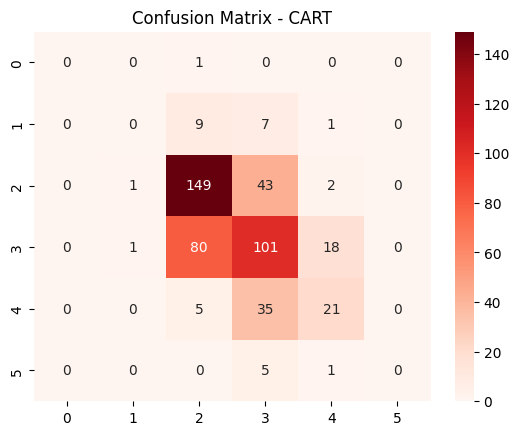

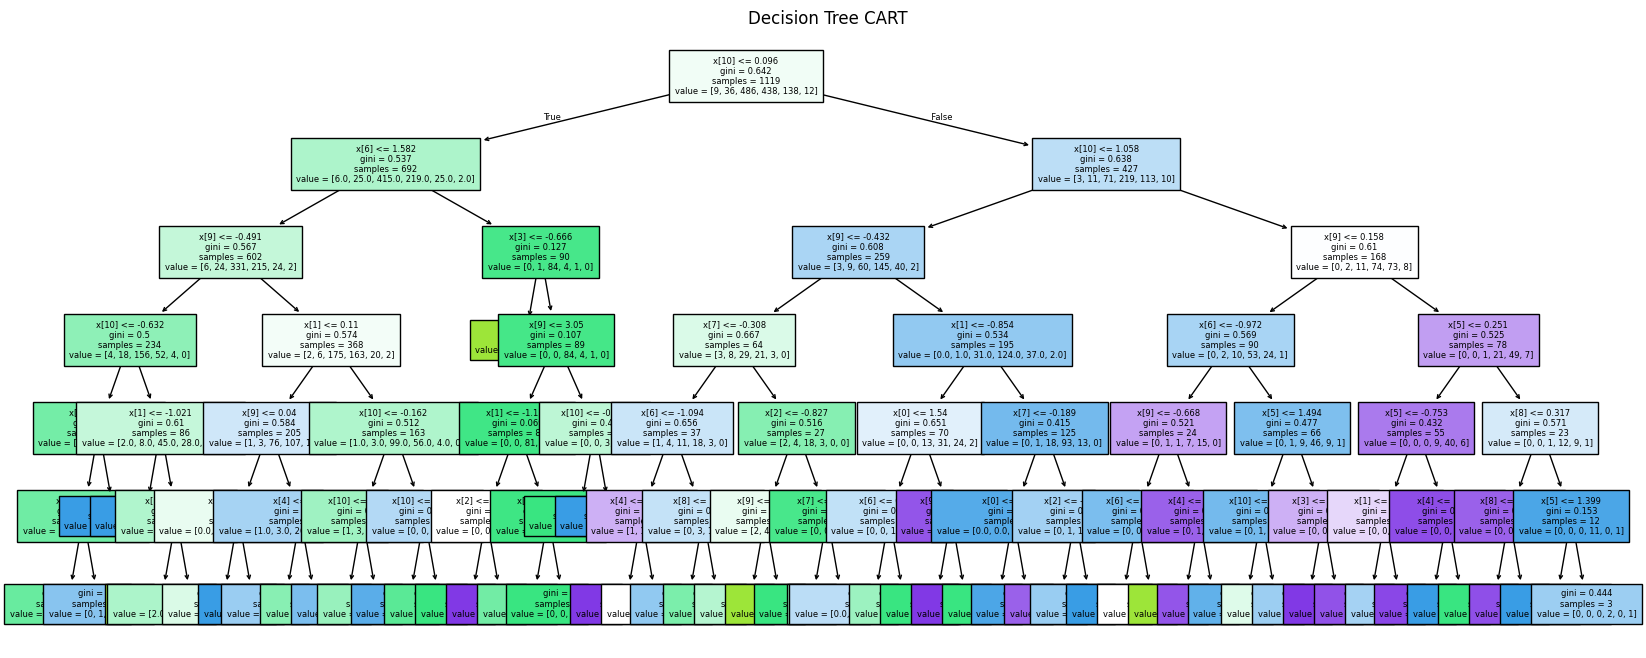

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 8: Mô hình CART (gini)")

cart = DecisionTreeClassifier(criterion="gini", max_depth=6)
cart.fit(X_train, y_train)

y_pred_cart = cart.predict(X_test)

print("Accuracy CART:", accuracy_score(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))

cm = confusion_matrix(y_test, y_pred_cart)
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix - CART")
plt.show()

plt.figure(figsize=(20,8))
plot_tree(cart, filled=True, fontsize=6)
plt.title("Decision Tree CART")
plt.show()


Trần Khôi Nguyên_6351071049 - Câu 9: Mô hình Naive Bayes
Accuracy NB: 0.5375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.61      0.64       195
           6       0.52      0.53      0.52       200
           7       0.40      0.52      0.45        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.28      0.30      0.29       480
weighted avg       0.55      0.54      0.54       480



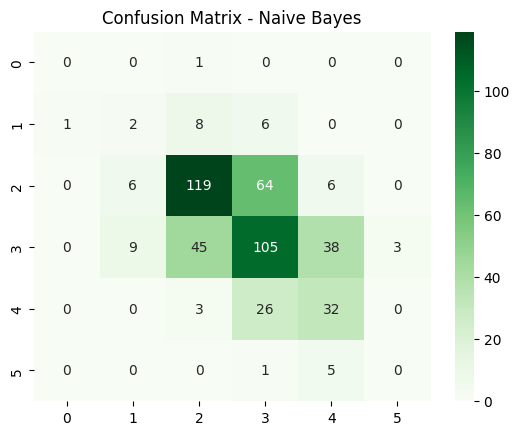

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 9: Mô hình Naive Bayes")

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Accuracy NB:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 10: So sánh mô hình")

print("Accuracy ID3 :", accuracy_score(y_test, y_pred_id3))
print("Accuracy CART:", accuracy_score(y_test, y_pred_cart))
print("Accuracy NB  :", accuracy_score(y_test, y_pred_nb))

print("""
Nhận xét:
- CART thường ổn định và có accuracy cao hơn.
- ID3 dễ overfit hơn vì dùng entropy.
- Naive Bayes đơn giản và chạy nhanh nhưng accuracy thấp hơn.
""")


Trần Khôi Nguyên_6351071049 - Câu 10: So sánh mô hình
Accuracy ID3 : 0.5791666666666667
Accuracy CART: 0.5645833333333333
Accuracy NB  : 0.5375

Nhận xét:
- CART thường ổn định và có accuracy cao hơn.
- ID3 dễ overfit hơn vì dùng entropy.
- Naive Bayes đơn giản và chạy nhanh nhưng accuracy thấp hơn.

